In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eminem-dataset/Eminem Dataset.csv


# Dataset Overview

 This dataset contains detailed information about the works of Eminem, one of the most famous hip-hop artists. The data includes tracks from various albums, their acoustic features, popularity, release dates, and collaborations with other artists. It allows for both musical and historical analysis, providing insights into the evolution of the artist’s style and his impact on the music industry.

## Column Descriptions

- **artist_name**: The artist's name (in this case, always "Eminem").
- **track_name**: The title of the track.
- **track_id**: The unique track identifier in streaming services.
- **album_name**: The name of the album the track is from.
- **album_id**: The unique album identifier.
- **release_date**: The release date of the track or album.
- **popularity**: The track’s popularity score (a numerical value, with higher values indicating greater popularity).
- **explicit**: Whether the track contains explicit content (values: True/False).
- **danceability**: A measure of the track’s danceability (from 0 to 1, with higher values indicating more danceable tracks).
- **energy**: A measure of the track’s energy (from 0 to 1, with higher values indicating more energetic tracks).
- **key**: The key of the track (e.g., C, D, G).
- **loudness**: The loudness of the track in decibels (negative values, where closer to 0 indicates higher loudness).
- **mode**: The mode of the track (Major – major key, Minor – minor key).
- **speechiness**: A measure of speech content in the track (from 0 to 1, with higher values indicating more spoken elements).
- **acousticness**: A measure of the track’s acoustic character (from 0 to 1, with higher values indicating a more acoustic nature).
- **instrumentalness**: A measure of the track’s instrumental nature (from 0 to 1, with higher values indicating more instrumental tracks).
- **liveness**: A measure of how "live" the track sounds (from 0 to 1, with higher values indicating a greater likelihood the track was recorded live).
- **valence**: A measure of the track’s emotional positivity (from 0 to 1, with higher values indicating a more positive mood).
- **tempo**: The tempo of the track in beats per minute (BPM).
- **time_signature**: The time signature of the track (e.g., 3, 4, 5).
- **featured_artists**: A list of artists who feature on the track.
- **type**: The type of release (e.g., Studio Album, Deluxe Album, Single).
- **duration**: The duration of the track in MM:SS format.
- **year**: The year the track was released.
- **month**: The month the track was released.
- **day_of_the_week**: The day of the week the track was released.


## --Load dataset --

In [2]:
data = pd.read_csv('/kaggle/input/eminem-dataset/Eminem Dataset.csv')
df = data.copy()

## --Verification and preparation of data for analysis --

In [3]:
df.head()

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,Eminem,8 Mile,5NmL2zxnlt9GiTB2TQbvFM,8 Mile (Music From And Inspired By The Motion ...,353HFOqGHySp027oyr3aGs,2002-10-29,60,True,0.740,0.940,...,0.132,0.489,89.981,4,NaN,Soundtrack Album,05:59,2002,October,Tuesday
1,Eminem,Rabbit Run,30KKYkJ0lonfKI2eaLACnZ,8 Mile (Music From And Inspired By The Motion ...,353HFOqGHySp027oyr3aGs,2002-10-29,53,True,0.563,0.842,...,0.160,0.336,95.392,4,NaN,Soundtrack Album,03:10,2002,October,Tuesday
2,Eminem,Lose Yourself,6GkTKjv1XbFVdI2D8vvDPu,8 Mile (Music From And Inspired By The Motion ...,353HFOqGHySp027oyr3aGs,2002-10-29,53,True,0.684,0.735,...,0.288,0.060,171.383,4,NaN,Soundtrack Album,05:20,2002,October,Tuesday
3,Eminem,Campaign Speech,1DiJsj5a4zBzWSUWdg2nTv,Campaign Speech,2mr6tc72GnDU2RJoLCQ1qX,2016-10-19,32,True,0.624,0.785,...,0.201,0.686,61.918,3,NaN,Single,07:48,2016,October,Wednesday
4,Eminem,Chloraseptic (feat. 2 Chainz & Phresher) - Remix,756ZV0boQJ6Kbk3WFBuVjD,Chloraseptic (feat. 2 Chainz & Phresher) [Remix],4J3umaQxh7W2eKIx0p2ErW,2018-01-08,43,True,0.887,0.725,...,0.333,0.441,135.950,4,"2 Chainz, PHresher",Single,04:56,2018,January,Monday


In [4]:
#data shape

print(f'This dataset contain {df.shape[0]} rows and {df.shape[1]} columns.')

This dataset contain 536 rows and 26 columns.


In [5]:
#basic information on non-null values and data type of individual columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       536 non-null    object 
 1   track_name        536 non-null    object 
 2   track_id          536 non-null    object 
 3   album_name        536 non-null    object 
 4   album_id          536 non-null    object 
 5   release_date      536 non-null    object 
 6   popularity        536 non-null    int64  
 7   explicit          536 non-null    bool   
 8   danceability      536 non-null    float64
 9   energy            536 non-null    float64
 10  key               536 non-null    object 
 11  loudness          536 non-null    float64
 12  mode              536 non-null    object 
 13  speechiness       536 non-null    float64
 14  acousticness      536 non-null    float64
 15  instrumentalness  536 non-null    float64
 16  liveness          536 non-null    float64
 1

In [6]:
#Check if the dataset contains duplicate rows.

print(f"This dataset contain {df.duplicated().sum()} duplicated rows.")

This dataset contain 0 duplicated rows.


In [7]:
#change data type for date column to datetime

df['release_date'] = pd.to_datetime(df['release_date'])

In [8]:
#Check for 'object' type columns and convert to 'category' if unique values <= 12

for column in df.select_dtypes(include=['object']).columns:
    print(column, df[column].nunique())

    
    if  df[column].nunique() <= 12:
        df[column] = df[column].astype('category')

artist_name 1
track_name 297
track_id 536
album_name 52
album_id 52
key 12
mode 2
featured_artists 73
type 7
duration 174
month 12
day_of_the_week 7


In [9]:
#Verification of the introduced changes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist_name       536 non-null    category      
 1   track_name        536 non-null    object        
 2   track_id          536 non-null    object        
 3   album_name        536 non-null    object        
 4   album_id          536 non-null    object        
 5   release_date      536 non-null    datetime64[ns]
 6   popularity        536 non-null    int64         
 7   explicit          536 non-null    bool          
 8   danceability      536 non-null    float64       
 9   energy            536 non-null    float64       
 10  key               536 non-null    category      
 11  loudness          536 non-null    float64       
 12  mode              536 non-null    category      
 13  speechiness       536 non-null    float64       
 14  acousticness      536 non-

In [10]:
# Convert MM:SS to total seconds

df['Duration Sec'] = df['duration'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

In [11]:
#Verification of the introduced changes

df[['duration','Duration Sec']].head()

,duration,Duration Sec
0,05:59,359
1,03:10,190
2,05:20,320
3,07:48,468
4,04:56,296


In [12]:
df.head()

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week,Duration Sec
0,Eminem,8 Mile,5NmL2zxnlt9GiTB2TQbvFM,8 Mile (Music From And Inspired By The Motion ...,353HFOqGHySp027oyr3aGs,2002-10-29,60,True,0.740,0.940,...,0.489,89.981,4,NaN,Soundtrack Album,05:59,2002,October,Tuesday,359
1,Eminem,Rabbit Run,30KKYkJ0lonfKI2eaLACnZ,8 Mile (Music From And Inspired By The Motion ...,353HFOqGHySp027oyr3aGs,2002-10-29,53,True,0.563,0.842,...,0.336,95.392,4,NaN,Soundtrack Album,03:10,2002,October,Tuesday,190
2,Eminem,Lose Yourself,6GkTKjv1XbFVdI2D8vvDPu,8 Mile (Music From And Inspired By The Motion ...,353HFOqGHySp027oyr3aGs,2002-10-29,53,True,0.684,0.735,...,0.060,171.383,4,NaN,Soundtrack Album,05:20,2002,October,Tuesday,320
3,Eminem,Campaign Speech,1DiJsj5a4zBzWSUWdg2nTv,Campaign Speech,2mr6tc72GnDU2RJoLCQ1qX,2016-10-19,32,True,0.624,0.785,...,0.686,61.918,3,NaN,Single,07:48,2016,October,Wednesday,468
4,Eminem,Chloraseptic (feat. 2 Chainz & Phresher) - Remix,756ZV0boQJ6Kbk3WFBuVjD,Chloraseptic (feat. 2 Chainz & Phresher) [Remix],4J3umaQxh7W2eKIx0p2ErW,2018-01-08,43,True,0.887,0.725,...,0.441,135.950,4,"2 Chainz, PHresher",Single,04:56,2018,January,Monday,296


In [13]:
#Verify that the artist name column contains only 'Eminem' and does not include any typos.

df['artist_name'].unique()


['Eminem']
Categories (1, object): ['Eminem']

In [14]:
# Drop the columns 'artist_name', 'track_id', and 'album_id' from the df as they are not needed for further analysis 

df.drop(columns=['artist_name', 'track_id','album_id'], inplace=True)

In [15]:
# Format column names: capitalize each word and replace underscores with spaces for better readability

df.columns = df.columns.str.title().str.replace('_', ' ')


In [16]:
df.head()

,Track Name,Album Name,Release Date,Popularity,Explicit,Danceability,Energy,Key,Loudness,Mode,...,Valence,Tempo,Time Signature,Featured Artists,Type,Duration,Year,Month,Day Of The Week,Duration Sec
0,8 Mile,8 Mile (Music From And Inspired By The Motion ...,2002-10-29,60,True,0.740,0.940,A,-4.195,Major,...,0.489,89.981,4,NaN,Soundtrack Album,05:59,2002,October,Tuesday,359
1,Rabbit Run,8 Mile (Music From And Inspired By The Motion ...,2002-10-29,53,True,0.563,0.842,F#/Gb,-3.639,Minor,...,0.336,95.392,4,NaN,Soundtrack Album,03:10,2002,October,Tuesday,190
2,Lose Yourself,8 Mile (Music From And Inspired By The Motion ...,2002-10-29,53,True,0.684,0.735,D,-4.596,Major,...,0.060,171.383,4,NaN,Soundtrack Album,05:20,2002,October,Tuesday,320
3,Campaign Speech,Campaign Speech,2016-10-19,32,True,0.624,0.785,F,-4.873,Major,...,0.686,61.918,3,NaN,Single,07:48,2016,October,Wednesday,468
4,Chloraseptic (feat. 2 Chainz & Phresher) - Remix,Chloraseptic (feat. 2 Chainz & Phresher) [Remix],2018-01-08,43,True,0.887,0.725,D,-6.534,Major,...,0.441,135.950,4,"2 Chainz, PHresher",Single,04:56,2018,January,Monday,296


## -- Explanatory Data Analysis -- ##

## How many tracks were released in each year?

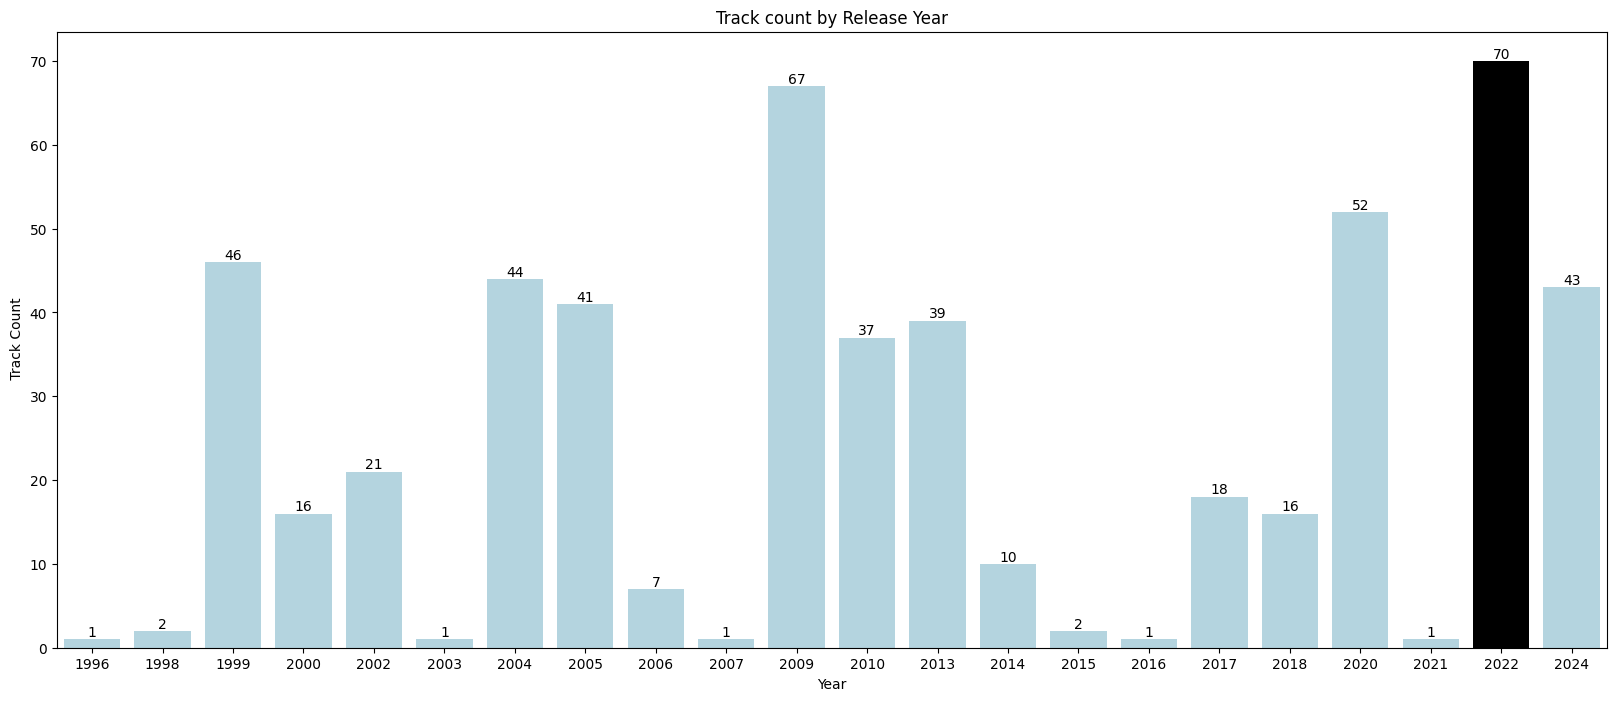

In [17]:
grouped_by_year =df.groupby('Year')['Track Name'].count().reset_index()

max_year = grouped_by_year.loc[grouped_by_year['Track Name'].idxmax(),'Year']
plt.figure(figsize=(20,8))
colors = ['black' if year ==max_year else 'lightblue' for year in grouped_by_year['Year']]
ax = sns.barplot(data=grouped_by_year,x='Year', y='Track Name', palette=colors)
plt.title('Track count by Release Year')
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel(' Track Count')
plt.show()

## What are Eminem's top 10 songs?

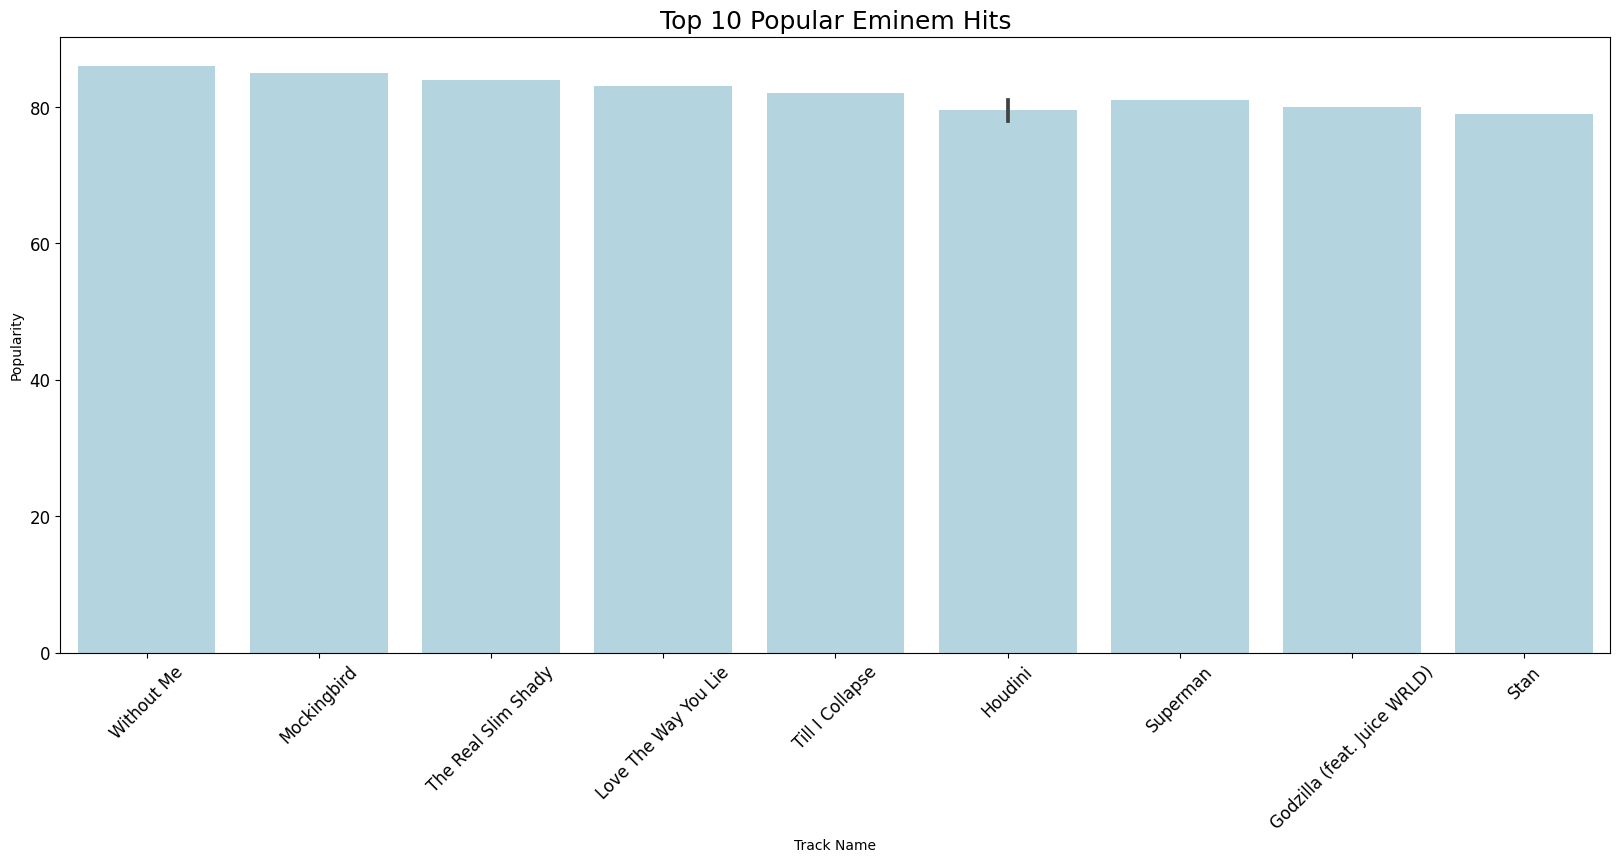

In [18]:
top_10_popularity_songs = df.nlargest(10, 'Popularity')[['Track Name','Popularity']]
plt.figure(figsize=(20,8))
sns.barplot(data= top_10_popularity_songs, x='Track Name', y='Popularity', color='lightblue')
plt.title("Top 10 Popular Eminem Hits", fontsize =18)
plt.ylabel("Popularity", fontsize=10)
plt.xlabel("Track Name")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The most popular song from this dataset is 'Without Me' (Studio Album Type) released in 2002 with 86 points of popularity. 

## What is the breakdown of the popularity of Eminem's songs?

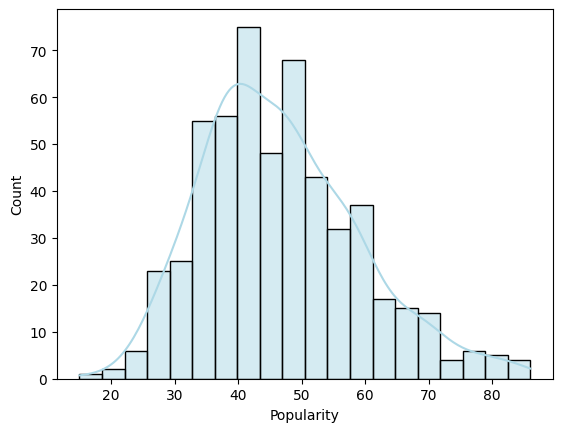

In [19]:
sns.histplot(data=df, x='Popularity',bins=20, kde=True,color='lightblue')
plt.show()

The popularity of Eminem's songs varies, but the majority of songs fall into the medium popularity range (40-50).
Songs with very high popularity (above 80) are few and belong to the biggest hits, such as ‘Without Me’ and ‘Mockingbird’.

## What are the differences in the spread of popularity between the different types of albums?

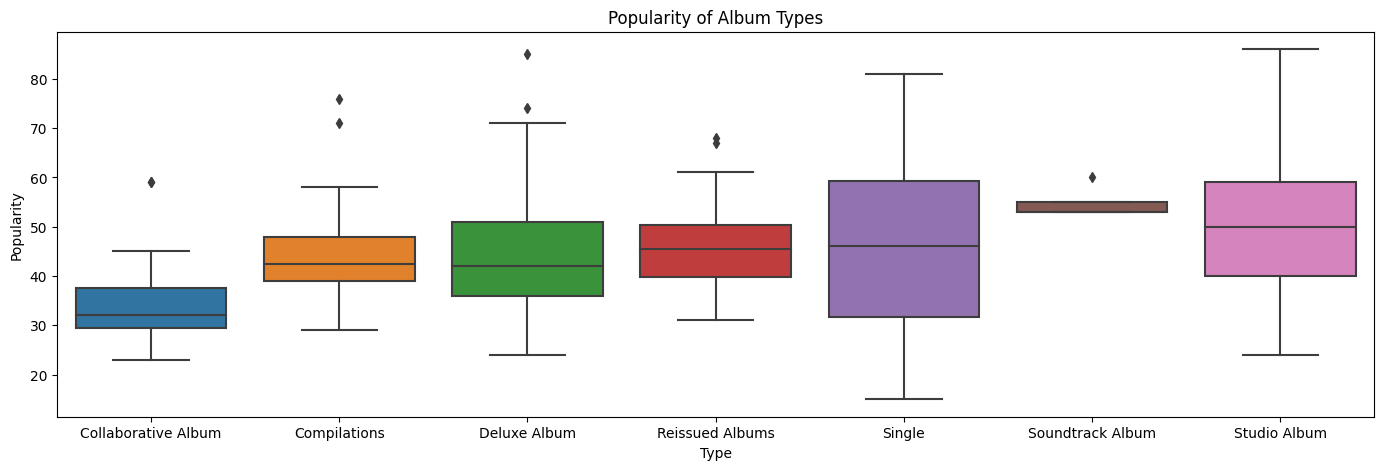

In [20]:
plt.figure(figsize=(17,5))
sns.boxplot(data=df, y='Popularity', x='Type')
plt.title('Popularity of Album Types')
plt.show()

1. The popularity of the Collaborative Album is generally low, with a median of around 30. The data distribution is narrow, which indicates that the popularity of this album is relatively consistent.
   
2. The median popularity is around 40, and the size of the data distribution is greater to that of the Collaborative Album. There are outlier values present above 60.

3. ...

In [21]:
df.loc[(df['Type'] =='Compilations') & (df['Popularity'] > 70)][['Track Name','Popularity']]

,Track Name,Popularity
55,Lose Yourself,76
56,Shake That,71


## What percentage of the songs contain explicit content?

In [22]:
explicit = df['Explicit'].value_counts() / len(df) * 100
print(f'Over {int(explicit[0])} % Songs contain explicit content.')

Over 93 % Songs contain explicit content.


In [23]:
df['Duration Sec'].describe()

count    536.000000
mean     247.095149
std       85.056442
min       30.000000
25%      216.000000
50%      263.500000
75%      298.000000
max      468.000000
Name: Duration Sec, dtype: float64

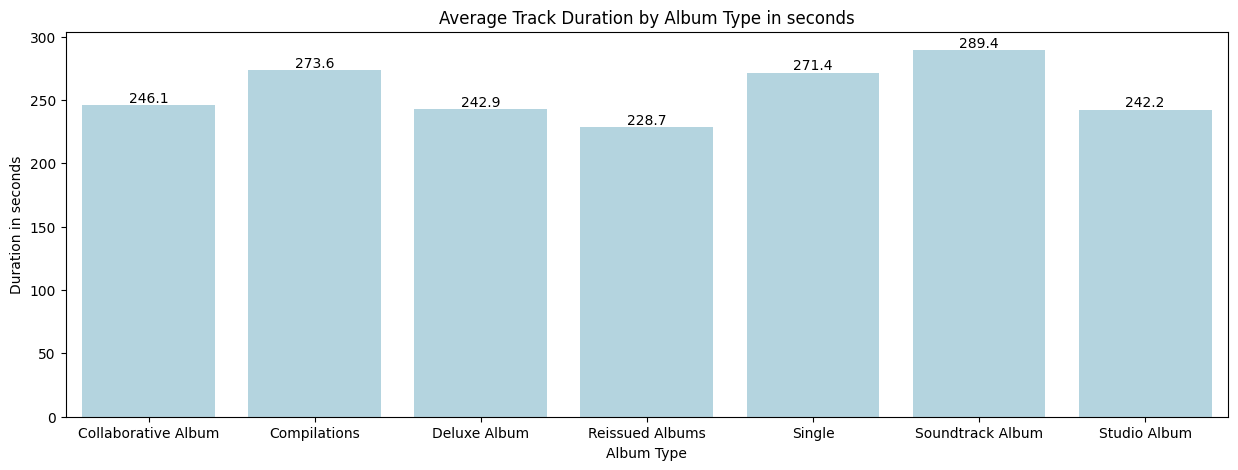

In [24]:
duration_by_type = df.groupby('Type')['Duration Sec'].mean().round(1).reset_index()
plt.figure(figsize=(15,5))

ax = sns.barplot(data=duration_by_type, x ='Type', y='Duration Sec', color='lightblue')
for container in ax.containers:
   ax.bar_label(container)


plt.title('Average Track Duration by Album Type in seconds')
plt.ylabel('Duration in seconds')
plt.xlabel('Album Type')
plt.show()
    

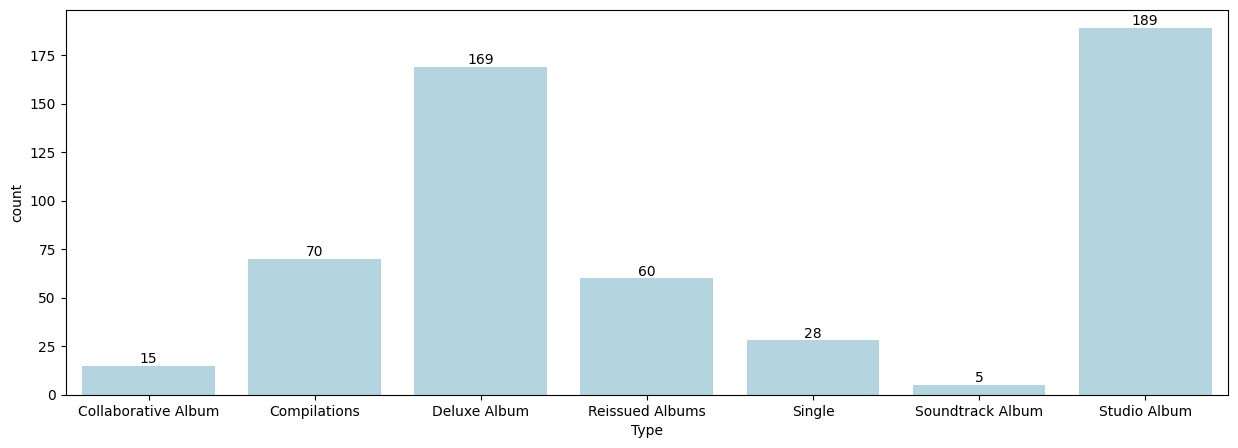

In [25]:
type_count = df['Type'].value_counts().reset_index()
plt.figure(figsize=(15,5))
ax = sns.barplot(data=type_count, x='Type', y='count', color='lightblue')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [26]:
df.duplicated().sum()

0

In [27]:
df.head()

,Track Name,Album Name,Release Date,Popularity,Explicit,Danceability,Energy,Key,Loudness,Mode,...,Valence,Tempo,Time Signature,Featured Artists,Type,Duration,Year,Month,Day Of The Week,Duration Sec
0,8 Mile,8 Mile (Music From And Inspired By The Motion ...,2002-10-29,60,True,0.740,0.940,A,-4.195,Major,...,0.489,89.981,4,NaN,Soundtrack Album,05:59,2002,October,Tuesday,359
1,Rabbit Run,8 Mile (Music From And Inspired By The Motion ...,2002-10-29,53,True,0.563,0.842,F#/Gb,-3.639,Minor,...,0.336,95.392,4,NaN,Soundtrack Album,03:10,2002,October,Tuesday,190
2,Lose Yourself,8 Mile (Music From And Inspired By The Motion ...,2002-10-29,53,True,0.684,0.735,D,-4.596,Major,...,0.060,171.383,4,NaN,Soundtrack Album,05:20,2002,October,Tuesday,320
3,Campaign Speech,Campaign Speech,2016-10-19,32,True,0.624,0.785,F,-4.873,Major,...,0.686,61.918,3,NaN,Single,07:48,2016,October,Wednesday,468
4,Chloraseptic (feat. 2 Chainz & Phresher) - Remix,Chloraseptic (feat. 2 Chainz & Phresher) [Remix],2018-01-08,43,True,0.887,0.725,D,-6.534,Major,...,0.441,135.950,4,"2 Chainz, PHresher",Single,04:56,2018,January,Monday,296


## What type of songs Eminem produces?

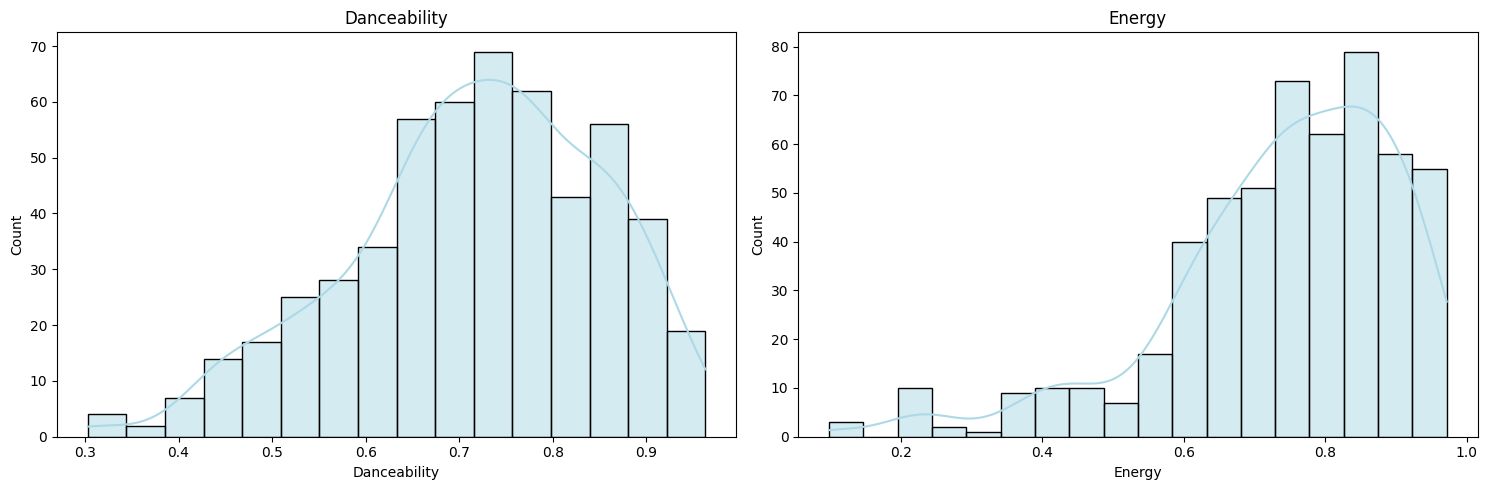

In [28]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
# Danceability ( A measure of how danceable a track is.) : range 0.0(less danceable rhythm) - 1.0 (more danceable rhythm)
sns.histplot(data=df,x='Danceability', kde=True, color='lightblue', ax=axes[0], stat='count')
axes[0].set_title('Danceability')
# Energy (the intensity and activity level of song.) : range 0.0(calm) - 1.0(energetic) 
sns.histplot(data=df,x='Energy', kde=True, color='lightblue',ax=axes[1])
axes[1].set_title('Energy')
plt.tight_layout()
plt.show()


The graphs suggest that the songs in the collection are mostly Danceability and Energy, with dominant values in the range 0.6-0.9. The Danceability distribution is more symmetrical, while Energy is shifted towards higher values. 

## What are Eminem's top 5 songs with the highest danceability score?

In [29]:
#Create a variable to store the unique values from the 'Track Name' column
unique_track_name = df.drop_duplicates(subset='Track Name')
#Sort the values by Danceability and save the first 5 rows
top_5_danceable_tracks = unique_track_name.sort_values(by='Danceability', ascending=False).head()
#Group rows by the'Album Name' column and display only the'Track Name' and 'Danceability' columns as the result
top_5_danceable_tracks.groupby('Album Name').apply(lambda x: x[['Track Name', 'Danceability']].sort_values(by='Danceability',ascending=False))


Track Name  \
Album Name                                                                   
Curtain Call: The Hits                            49            Shake That   
                                                  45          Just Lose It   
                                                  47   The Real Slim Shady   
Kamikaze                                          137           The Ringer   
Music To Be Murdered By - Side B (Deluxe Edition) 176               Killer   

                                                       Danceability  
Album Name                                                           
Curtain Call: The Hits                            49          0.963  
                                                  45          0.951  
                                                  47          0.950  
Kamikaze                                          137         0.939  
Music To Be Murdered By - Side B (Deluxe Edition) 176         0.942

Among the tracks distinguished by a high danceability score, the following can be highlighted:
Shake That, Just Lose It, The Real Slim Shady, Killer and The Ringer. All of them have danceability score over 0.90. Three of them comes from "Curtain Call: The Hits" Album -> [Listen on Spotify](https://open.spotify.com/album/1zUY4PAFrNUOCeaEBrEHzh?si=U-iW2EXdR9ePjs3L9wbFeg).

## What are Eminem's top 5 songs with the highest energy score?

In [30]:
top_5_energetic_tracks = unique_track_name.sort_values(by='Energy', ascending = False).head()
top_5_energetic_tracks.groupby('Album Name').apply(lambda x: x[['Track Name', 'Energy']].sort_values(by='Energy', ascending=False))

Track Name  \
Album Name                                                                       
Music To Be Murdered By 160  Yah Yah (feat. Royce Da 5'9", Black Thought, Q...   
Recovery                214                                    Cold Wind Blows   
                        217                                   Talkin’ 2 Myself   
                        221                                      Almost Famous   
Relapse                 258                                       Tonya - Skit   

                             Energy  
Album Name                           
Music To Be Murdered By 160   0.966  
Recovery                214   0.972  
                        217   0.963  
                        221   0.961  
Relapse                 258   0.969

Among the tracks distinguished by a high energetic score, the following can be highlighted:
Cold Wind Blows, Tonya-Skit, Yah Yah, Talkin’ 2 Myself and Almost Famous. All of them have energetic score over 0.95. Three of them comes from "Recovery" Album -> [Listen on Spotify](https://open.spotify.com/album/47BiFcV59TQi2s9SkBo2pb?si=RegyAU3nRJW-knX7Jrrz5A).

In [31]:
df.head()

,Track Name,Album Name,Release Date,Popularity,Explicit,Danceability,Energy,Key,Loudness,Mode,...,Valence,Tempo,Time Signature,Featured Artists,Type,Duration,Year,Month,Day Of The Week,Duration Sec
0,8 Mile,8 Mile (Music From And Inspired By The Motion ...,2002-10-29,60,True,0.740,0.940,A,-4.195,Major,...,0.489,89.981,4,NaN,Soundtrack Album,05:59,2002,October,Tuesday,359
1,Rabbit Run,8 Mile (Music From And Inspired By The Motion ...,2002-10-29,53,True,0.563,0.842,F#/Gb,-3.639,Minor,...,0.336,95.392,4,NaN,Soundtrack Album,03:10,2002,October,Tuesday,190
2,Lose Yourself,8 Mile (Music From And Inspired By The Motion ...,2002-10-29,53,True,0.684,0.735,D,-4.596,Major,...,0.060,171.383,4,NaN,Soundtrack Album,05:20,2002,October,Tuesday,320
3,Campaign Speech,Campaign Speech,2016-10-19,32,True,0.624,0.785,F,-4.873,Major,...,0.686,61.918,3,NaN,Single,07:48,2016,October,Wednesday,468
4,Chloraseptic (feat. 2 Chainz & Phresher) - Remix,Chloraseptic (feat. 2 Chainz & Phresher) [Remix],2018-01-08,43,True,0.887,0.725,D,-6.534,Major,...,0.441,135.950,4,"2 Chainz, PHresher",Single,04:56,2018,January,Monday,296


## Which key is most commonly used in Eminem's songs?

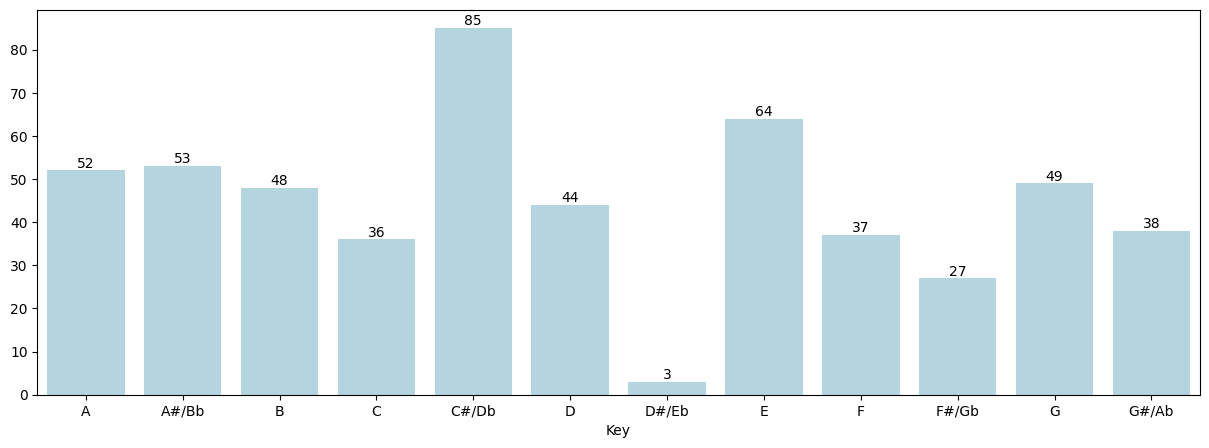

In [32]:
key_counts = df['Key'].value_counts().sort_index()

plt.figure(figsize =(15,5))
ax = sns.barplot(data=df, x=key_counts.index, y=key_counts.values, color='lightblue')
for container in ax.containers:
    ax.bar_label(container)

The most commonly used key in Eminem's songs is C#/Db, likely due to its distinctive sound that complements his style. The keys E, A#/Bb, and A are also important, but not as much as C#/Db.

## How many artists has Eminem collaborated with?

In [175]:
Featured_Artists_dropna = df[['Year', 'Featured Artists']].dropna()

Featured_Artists_dropna['Featured Artists'] = Featured_Artists_dropna['Featured Artists'].str.split(", ")

FA_exploded = Featured_Artists_dropna.explode('Featured Artists')

unique_fa_per_year = FA_exploded.drop_duplicates()

artists_counts = unique_fa_per_year.groupby('Year')['Featured Artists'].count().reset_index()
artists_counts.head()

,Year,Featured Artists
0,1999,6
1,2000,10
2,2002,6
3,2003,2
4,2004,5


In [134]:
print(f"Eminem collaborated with {artists_counts['Featured Artists'].sum()} artists.")

Eminem collaborated with 134 artists.


## Which year had the most collaborations with other artists?

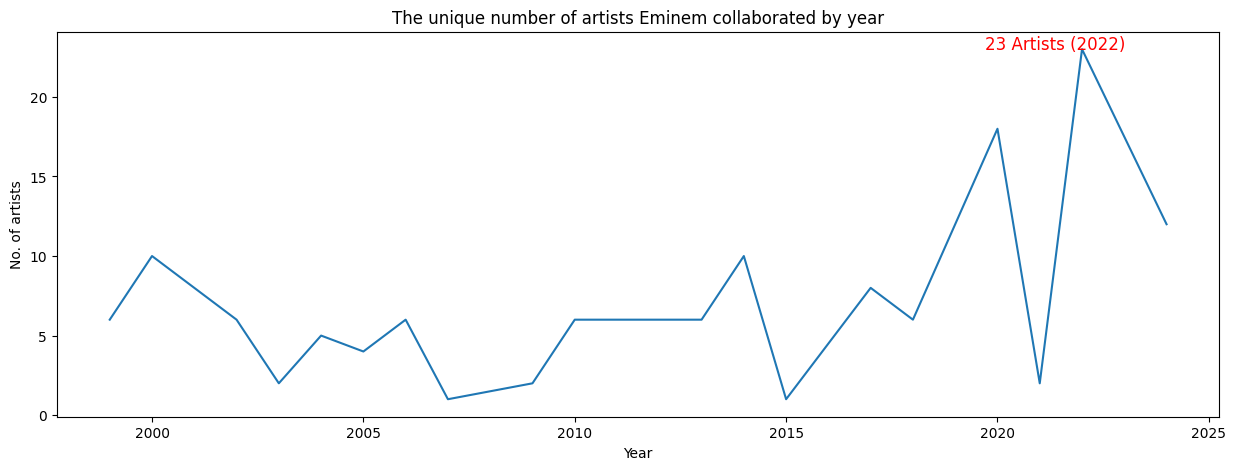

In [194]:
plt.figure(figsize=(15,5))
sns.lineplot(data=artists_counts, x='Year', y='Featured Artists')
plt.title('The unique number of artists Eminem collaborated by year')
plt.ylabel('No. of artists')
max_year = artists_counts.loc[artists_counts['Featured Artists'].idxmax(), 'Year']
max_value = artists_counts['Featured Artists'].max()
plt.annotate(f"{max_value} Artists ({max_year})", xy=(max_year, max_value), fontsize=12,color='red', xytext =(max_year -2.3, max_value))
plt.show()

In [191]:
artists_2022 = FA_exploded.loc[FA_exploded['Year'] == 2022, 'Featured Artists'].drop_duplicates()
print('In year 2022 Eminem collaborated with:')
for artist in artists_2022.values:
    print(artist)

In year 2022 Eminem collaborated with:
50 Cent
Gwen Stefani
Snoop Dogg
Dr. Dre
Juice WRLD
CeeLo Green
Rihanna
Joyner Lucas
Ed Sheeran
Lil Wayne
Mr. Cii
P!nk
Beyoncé
Nate Ruess
Kehlani
Tony Yayo
Lloyd Banks
Dina Rae
Nate Dogg
Hailie Jade
D12
Obie Trice
Proof


## Which artist has Eminem collaborated with the most so far, and which songs have they created together?

In [131]:
artists = FA_exploded.groupby('Featured Artists')['Featured Artists'].count().sort_values(ascending=False)
artists.head()

Featured Artists
Dr. Dre         20
50 Cent         14
Royce Da 5\9    13
Skylar Grey      8
White Gold       7
Name: Featured Artists, dtype: int64

Eminem has most often collaborated with Dr. Dre.

In [199]:
dre_tracks = df[df['Featured Artists'].str.contains('dre', case=False, na=False)]


dre_tracks[['Track Name', 'Album Name', 'Featured Artists','Year']].drop_duplicates()

,Track Name,Album Name,Featured Artists,Year
9,Crack A Bottle (feat. Dr. Dre & 50 Cent),Curtain Call 2,"Dr. Dre, 50 Cent",2022
52,Guilty Conscience,Curtain Call: The Hits,Dr. Dre,2005
70,Guilty Conscience,Curtain Call: The Hits (Deluxe Edition),Dr. Dre,2005
178,Guns Blazing (feat. Dr. Dre & Sly Pyper),Music To Be Murdered By - Side B (Deluxe Edition),"Dr. Dre, Sly Pyper",2020
243,Crack A Bottle,Relapse,"Dr. Dre, 50 Cent",2009
254,Old Time's Sake,Relapse,Dr. Dre,2009
262,Crack A Bottle,Relapse [Deluxe],"Dr. Dre, 50 Cent",2009
275,Old Time's Sake,Relapse [Deluxe],Dr. Dre,2009
282,Crack A Bottle,Relapse: Refill,"Dr. Dre, 50 Cent",2009
293,Old Time's Sake,Relapse: Refill,Dr. Dre,2009


Did collaboration with Dr. Dre produce any popular hits?

In [214]:
dre_popularity_over_70 = dre_tracks.query('Popularity >= 70')
dre_popularity_over_70.head()

,Track Name,Album Name,Release Date,Popularity,Explicit,Danceability,Energy,Key,Loudness,Mode,...,Valence,Tempo,Time Signature,Featured Artists,Type,Duration,Year,Month,Day Of The Week,Duration Sec
435,Bitch Please II,The Marshall Mathers LP,2000-05-23,71,True,0.918,0.586,C#/Db,-2.89,Major,...,0.779,95.517,4,"Dr. Dre, Snoop Dogg, Xzibit, Nate Dogg",Studio Album,04:48,2000,May,Tuesday,288


Only one song created with Dr. Dre gained popularity higher than 70 - > [Bitch Please II - Listen on Spotify](https://open.spotify.com/track/7lgvU7WnwcNZ8dbGUz8yhP?si=b09e942533e54aef)